# Автокодировщики

Объект описывается слишком большим количеством признаков? Хочется уменьшить их чилсло и не потерять важную информацию? Вам надоел PCA? Тогда автокодировщики идут к вам! 

## Почиташки 

* [Хорошая серия статей](https://habrahabr.ru/post/331382/) про автокодировщики и GAN. Немного подворовал код у них. 
* [Глава книги](http://www.deeplearningbook.org/contents/autoencoders.html) deep learning book, на которой основана серия сатей выше. 
* [Статья из блога про Keras](https://blog.keras.io/building-autoencoders-in-keras.html), на которой также основана статья выше (все воруют код у всех, просто ужас, блин). 
* [Неделя 4 курса Introduction to deep learning](https://www.coursera.org/learn/intro-to-deep-learning/home/week/4), с которой также взята часть материалов, и на которой я был ментором (возможно, что это оправдывает меня). Можно заодно [посмотреть тетрадку с этого курса.](https://github.com/hse-aml/intro-to-dl/blob/master/week4/Autoencoders-task.ipynb) Неожиданно, но она тоже с лицами...  Неожиданно, но код похож... Или даже сворован...

## Про автокодировщики 

Эпоха больших данных даёт нам слишком много данных. Часто хочется, чтобы их было немного поменьше, но при этом они выражали бы всю информацию о великом процессе порождения данных более ёмко. Не потерять в знании, но сэкономить! Именно из такого благородного помысла рождается метод главных компонент. Его посыл очень прост: давайте посмотрим на наши данные, найдём в них те направления, в которых происходит самое сильное изменение и оставим только их. При этом, в плане информации мы бы не потеряли особо много. Именно так часто поступают в случае, когда размерность данных очень большая. Находят $d$ Направлений, разброс в которых покрывает $90\%$ дисперсии, а остальное забывают. 

Например, если у нас есть выборка из карасей и щук и требуется научится отличать одних от ругих, то мы могли бы оставить только информацию о чешуйках, расположенных вдоль первой, более длинной компоненты. На качество нашего классификатора это бы повлияло слабо, но мы, при этом, избавились бы от лишней размерности, от оценки лишнего коэфициента и могли бы пустить большее число наблюдений на оценку меньшего числа параметров.  

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/PCA_fish.png/256px-PCA_fish.png)

Главная фишка метода главных компонент состоит в том, что он делает всю эту редукцию линейно. На самом деле все новые признаки будут представлять из себя линейные комбинации из старых. 

Идею такой редукции лишней информации можно обобщить до нелинейного случая и сделать прыжок к нейросетям, которые называются **автоэнокдерами.**  Автоэнкодеры учатся оставлять минимум информации так, чтобы по этому минимуму было возможно восстановить с очень высокой точностью исходную информацию. 

Автоэнкодеры — это нейронные сети прямого распространения, которые восстанавливают входной сигнал на выходе. Внутри у них имеется скрытый слой, который представляет собой код, описывающий модель. Автоэнкодеры конструируются таким образом, чтобы не иметь возможность точно скопировать вход на выходе. Обычно их ограничивают в размерности кода. 

![](https://hsto.org/web/cf6/228/613/cf6228613fdc4f8fb819cbd41bb677eb.png) 

Закодированную часть Входной сигнал восстанавливается с ошибками из-за потерь при кодировании, но, чтобы их минимизировать, сеть вынуждена учиться отбирать наиболее важные признаки.

Новый пример! Пусть у нас есть куча рукописных цифр и мы хотели бы научить компьютер понимать где какая цифра нарисована. Каждая цифра это картинка из пикселей размер $28 \times 28$. Всего у нас $28^2$ наблюдаемые переменные. Это слишком много! Явно не каждый пиксель несёт в себе информацию о том какая цифра нарисована на картинке. Большая часть пикселей бесполезна. 

Чтобы отобрать самые важные нелинейные комбинации из пикселей, мы можем сделать следующее: 

![](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

Нейросеть получает на вход цифру, пытается оставить 10 самых важных нейлинейных комбинаций из пикселей, а после по этим самым важным комбинациям, она пытается восстановить цифру назад с как можно большей точностью. Ограничение на то сколько самых важных нелинейных пикселей должно остаться, заставляет нашу сетку стараться отобрать исключительно всё самое важное, что можно найти на картинке. Метод главных компонент будет частным, самым простым случаем, такой нейронной сетки. 

Первая часть автокодировщика $g(x)$ называется **encoder**. Она пытается закодировать картинку. Вторая часть $f(h)$ называет **decoder**. Она пытается раскодировать картинку. Автоэккодер, изменяя $f$ и $g$ пытается выучить тождественную функцию 

$$x = f(g(x)),$$ 

минимизируя какой-то функционал ошибки 

$$L(x, f(g(x))).$$ 

При этом выучить тождественную выборку он не может, так как в сердцевине находится  **бутылочное горлышко** с довольно маленьким числом нейронов. В итоге сетка вынуждена отаравлять в сердцевину только те комбинации фичей, по которым легче всего восстановить входные данные, и таким образом отсеивает ненужную информацию. В горлышке в результате обучения оказываются наши новые нелинейные фичи. 

In [1]:
import tensorflow as tf 
tf.__version__

'2.0.0'

In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers as L

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Данные.

Будем учить свой автокодировщик для человеческих лиц. Пользоваться будем lfw-датасетом:

* http://vis-www.cs.umass.edu/lfw

In [4]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=0, resize=0.5, color=False,
                              slice_=(slice(94, 190, None), slice(78, 174, None)))

In [5]:
lfw_people.data.dtype

dtype('float32')

In [6]:
lfw_people.images.shape

(13233, 48, 48)

In [7]:
lfw_people.images[0].shape

(48, 48)

In [8]:
lfw_people.target_names[0] # имена людей

'AJ Cook'

In [9]:
from sklearn.model_selection import train_test_split

X = lfw_people.images
IMG_SHAPE = X.shape[1:]

X = X.astype('float32') / 255.0
X = X[...,None]
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)

In [10]:
X.shape

(13233, 48, 48, 1)

(48, 48, 1)

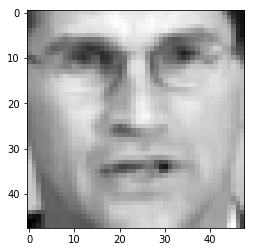

In [11]:
plt.imshow(X_train[0,:,:,0], cmap='gray')
X_train[0].shape

Хочу ещё данных!

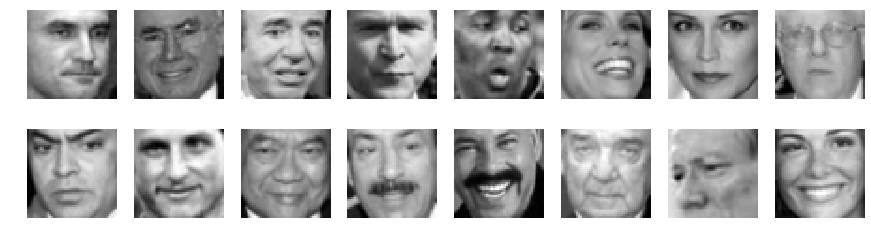

In [12]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(X_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.axis('off')
        ax.imshow(X_train[random_index,:,:,0], cmap='gray')
plt.show()

С этим можно уже учить модели. 

## 2. Собираем автокодировщик для PCA 

Как мы уже выяснили, простейшим автокодировщиком является PCA. Один слой на входе, бутылочное горлышко с новыми фичами, один слой на выходе и PCA готов. 

In [13]:
input_shape = X_train.shape[1:]
input_shape

(48, 48, 1)

In [14]:
np.prod(input_shape) # пикселей

2304

In [15]:
def build_pca_autoencoder(img_shape, code_size=36):
    # code_size это размерность кодированного представления (фичей на выходе)
    
    # Энкодер 
    encoder = Sequential()
    encoder.add(L.InputLayer(img_shape)) # Входной слой размерность будет 28 28 1 
    encoder.add(L.Flatten())             # Вспомогательный слой решейпинга 
    encoder.add(L.Dense(code_size))      # Обратите внимание, что нет активации 
    
    # Декодер 
    decoder = Sequential()
    decoder.add(L.InputLayer((code_size,))) # Принимаем закодированное представление на вход
    decoder.add(L.Dense(np.prod(img_shape)))
    decoder.add(L.Reshape(img_shape))
    return encoder,decoder

Осталось только собрать модель из моделей. 

In [16]:
# Сконструировали энкодер и декодер 
encoder, decoder = build_pca_autoencoder(input_shape, code_size=36)

inp = L.Input(input_shape)  # Вход
code = encoder(inp)         # Энкодер от входа 
reconstruction = decoder(code)  # Декодер от кода 

# Скрепили две наши сетки в одну общую модель
autoencoder = Model(inp, reconstruction)

# Собираем сеть с методом оптимизации и выбранной ошибкой 
autoencoder.compile('adam', 'mse') 

# Посмотрим на параметры 
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
sequential (Sequential)      (None, 36)                82980     
_________________________________________________________________
sequential_1 (Sequential)    (None, 48, 48, 1)         85248     
Total params: 168,228
Trainable params: 168,228
Non-trainable params: 0
_________________________________________________________________


Обратите внимание что энкодер восстанавливает вход на выходе. У нас нет меток для обучения, а надо, чтобы ими были сами по себе исходные картинки. Немного подправим генератор данных, чтобы это правда было так. 

In [17]:
# Обучаем модель 
hist_1 = autoencoder.fit(x = X_train, y = X_train,  # Обратите внимание что энкодер восстанавливает вход на выходе 
                epochs = 40,                        # Никакие y тут не нужны. Это просто лэйблы... 
                batch_size = 256,
                shuffle = True,
                validation_data = [X_test, X_test])

Train on 11909 samples, validate on 1324 samples
Epoch 1/40
11909/11909 [==============================] - 1s 76us/sample - loss: 0.0700 - val_loss: 0.0208
Epoch 2/40
11909/11909 [==============================] - 0s 30us/sample - loss: 0.0198 - val_loss: 0.0187
Epoch 3/40
11909/11909 [==============================] - 0s 35us/sample - loss: 0.0169 - val_loss: 0.0153
Epoch 4/40
11909/11909 [==============================] - 0s 30us/sample - loss: 0.0147 - val_loss: 0.0148
Epoch 5/40
11909/11909 [==============================] - 0s 26us/sample - loss: 0.0139 - val_loss: 0.0135
Epoch 6/40
11909/11909 [==============================] - 0s 29us/sample - loss: 0.0129 - val_loss: 0.0126
Epoch 7/40
11909/11909 [==============================] - 0s 27us/sample - loss: 0.0123 - val_loss: 0.0120
Epoch 8/40
11909/11909 [==============================] - 0s 25us/sample - loss: 0.0113 - val_loss: 0.0111
Epoch 9/40
11909/11909 [==============================] - 0s 26us/sample - loss: 0.0107 - val_l

Наш автокодировщик обучился. это довольно приятная новость. Попробуем отрисовать оригинальные изображения, их компактные представления и то как по этим представлениям изображения восстанавливаются. 

In [18]:
# Функция для отрисовки ооигинальных цифр, их представления и восстановленного рисунка
def visualize(img, encoder, decoder):
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(img[:,:,0], cmap='gray')

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(reco.clip(0,1)[:,:,0], cmap='gray')
    plt.show()

Final MSE: 0.0057119223123185585


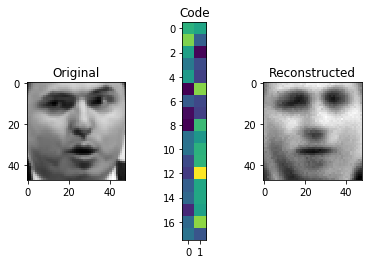

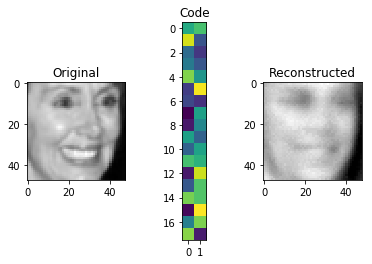

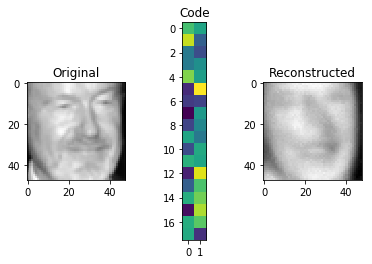

In [19]:
score = autoencoder.evaluate(X_test, X_test,verbose=0)
print("Final MSE:",score)

for i in range(3):
    img = X_test[i]
    visualize(img,encoder,decoder)

Теперь по оставшимся 36 фичам (вместо оригинальных 784) можно строить классификаторы. Попробуйте на досуге заняться этим весёлым занятием, а мы движемся дальше. 

## 3 Глубокий автоэнкодер 

Всегда можно лучше! Сконструируем глубокий автокодировщик для вычленения нелинейных фичей. 

![ ](https://pbs.twimg.com/media/CYggEo-VAAACg_n.png:small)

* Обратите внимание, что при постройке автокодировщика не должно быть слоёв меньших, чем бутылочное горлышко (выход энкодера). 
* Также обратите внимание, что вполне уместно использовать свёртки и пулинг, но такой автокодировщик будет построен чуточку ниже. 

In [20]:
def build_deep_autoencoder(input_shape, code_size=36):
    # code_size это размерность кодированного представления 
    
    # Энкодер 
    encoder = Sequential()
    encoder.add(L.InputLayer(input_shape)) # Входной слой размерность будет 28 28 1 
    encoder.add(L.Flatten()) # Вспомогательный слой решейпинга 
   
    # Слои глубокого энкодера 
    encoder.add(L.Dense(code_size*2, activation='relu'))
    encoder.add(L.Dense(code_size, activation='linear')) # Бутылочное горлышко
    
    # Декодер 
    decoder = Sequential()
    decoder.add(L.InputLayer((code_size,))) # Принимаем закодированное представление на вход
    
    # Слои глубокого декодирования
    decoder.add(L.Dense(code_size*2, activation='relu'))  # Обратите внимание, что слои идут в обратном порядке
    decoder.add(L.Dense(np.prod(input_shape))) # Развёртываем картинку 
    decoder.add(L.Reshape(input_shape))
    return encoder,decoder

# Сконструировали энкодер и декодер 
encoder,decoder = build_deep_autoencoder(input_shape, code_size=36)

inp = L.Input(input_shape)        # Вход
code = encoder(inp)             # Энкодер от входа 
reconstruction = decoder(code)  # Декодер от кода 

# Автоэнокодер от входа и выхода 
autoencoder = Model(inp,reconstruction)
autoencoder.compile('adam',loss='mse') # Собираем сеть с методом оптимизации и выбранной ошибкой 

# Посмотрим на параметры 
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 36)                168588    
_________________________________________________________________
sequential_3 (Sequential)    (None, 48, 48, 1)         170856    
Total params: 339,444
Trainable params: 339,444
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Обучаем модель 
hist_2 = autoencoder.fit(x = X_train, y = X_train,  # Обратите внимание что энкодер восстанавливает вход на выходе 
                epochs = 40,                        # Никакие y тут не нужны. Это просто лэйблы... 
                batch_size = 256,
                shuffle = True,
                validation_data=[X_test, X_test])

Train on 11909 samples, validate on 1324 samples
Epoch 1/40
11909/11909 [==============================] - 1s 82us/sample - loss: 0.0597 - val_loss: 0.0204
Epoch 2/40
11909/11909 [==============================] - 1s 43us/sample - loss: 0.0197 - val_loss: 0.0187
Epoch 3/40
11909/11909 [==============================] - 0s 40us/sample - loss: 0.0163 - val_loss: 0.0149
Epoch 4/40
11909/11909 [==============================] - 0s 39us/sample - loss: 0.0145 - val_loss: 0.0145
Epoch 5/40
11909/11909 [==============================] - 0s 38us/sample - loss: 0.0141 - val_loss: 0.0139
Epoch 6/40
11909/11909 [==============================] - 0s 38us/sample - loss: 0.0134 - val_loss: 0.0131
Epoch 7/40
11909/11909 [==============================] - 0s 40us/sample - loss: 0.0125 - val_loss: 0.0123
Epoch 8/40
11909/11909 [==============================] - 0s 38us/sample - loss: 0.0119 - val_loss: 0.0118
Epoch 9/40
11909/11909 [==============================] - 0s 37us/sample - loss: 0.0115 - val_l

Final MSE: 0.009488383074518957


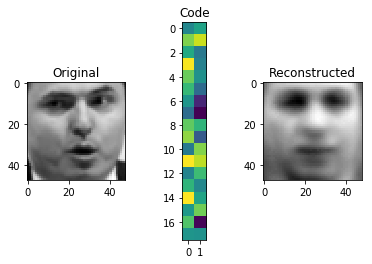

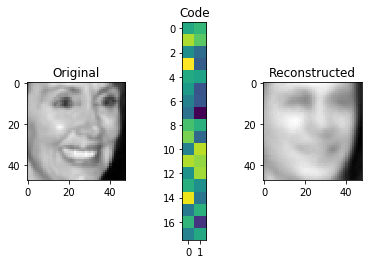

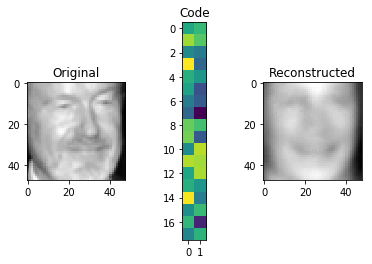

In [22]:
score = autoencoder.evaluate(X_test, X_test,verbose=0)
print("Final MSE:",score)

for i in range(3):
    img = X_test[i]
    visualize(img,encoder,decoder)

## 4. Свёрточный автокодировщик 

Добавим свёрточные слои и немного макспулинга. Это позволит сделать автокдировщик инвариантным к расположению цифр в пространстве. 

In [23]:
def build_conv_autoencoder(input_shape, code_size=36):
    # code_size это размерность кодированного представления 
    
    # Энкодер 
    encoder = Sequential()
    encoder.add(L.InputLayer(input_shape))

    encoder.add(L.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
    encoder.add(L.MaxPooling2D(pool_size=(2,2)))
    encoder.add(L.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
    encoder.add(L.MaxPooling2D(pool_size=(2,2)))
    encoder.add(L.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
    encoder.add(L.MaxPooling2D(pool_size=(2,2)))
    encoder.add(L.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
    encoder.add(L.MaxPooling2D(pool_size=(2,2)))
    encoder.add(L.Flatten())                  
    encoder.add(L.Dense(code_size))  # На этом моменте представление  (6, 6, 1) т.е. 36-размерное
       
    # Декодер 
    decoder = Sequential()
    decoder.add(L.InputLayer((code_size,))) # Принимаем закодированное представление на вход (РАЗМЕРНОСТЬ!)
    decoder.add(L.Dense(6*6*256))
    decoder.add(L.Reshape((6,6,256)))
    decoder.add(L.Conv2DTranspose(filters=128, kernel_size=(3, 3),  activation='relu', padding='same'))
    decoder.add(L.UpSampling2D((2,2)))
    decoder.add(L.Conv2DTranspose(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    decoder.add(L.UpSampling2D((2,2)))
    decoder.add(L.Conv2DTranspose(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
    decoder.add(L.UpSampling2D((2,2)))
    decoder.add(L.Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same'))
    return encoder,decoder

In [24]:
# Сконструировали энкодер и декодер 
encoder,decoder = build_conv_autoencoder(input_shape,code_size=36)

inp = L.Input(input_shape)  # Вход
code = encoder(inp)       # Энкодер от входа 
reconstruction = decoder(code)  # Декодер от кода 

# Автоэнокодер от входа и выхода 
autoencoder =  Model(inp, reconstruction)

# sgd = tf.keras.optimizers.Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
autoencoder.compile(optimizer='adam', loss='mse') # Собираем сеть с методом оптимизации и выбранной ошибкой 

# Посмотрим на параметры 
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 36)                470820    
_________________________________________________________________
sequential_5 (Sequential)    (None, 48, 48, 1)         728577    
Total params: 1,199,397
Trainable params: 1,199,397
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Модель будет обучаться ну оооочень долго... 
# Ошибка падает довольно быстро, добавлять свёртку было хорошей идеей
hist_3 = autoencoder.fit(X_train, X_train,
                        epochs=10,
                        batch_size=256,
                        shuffle=True,
                        validation_data=(X_test, X_test))

Train on 11909 samples, validate on 1324 samples
Epoch 1/10
11909/11909 [==============================] - 58s 5ms/sample - loss: 0.0236 - val_loss: 0.0174
Epoch 2/10
11909/11909 [==============================] - 52s 4ms/sample - loss: 0.0140 - val_loss: 0.0120
Epoch 3/10
11909/11909 [==============================] - 53s 4ms/sample - loss: 0.0111 - val_loss: 0.0098
Epoch 4/10
11909/11909 [==============================] - 54s 5ms/sample - loss: 0.0090 - val_loss: 0.0087
Epoch 5/10
11909/11909 [==============================] - 54s 5ms/sample - loss: 0.0079 - val_loss: 0.0074
Epoch 6/10
11909/11909 [==============================] - 54s 5ms/sample - loss: 0.0071 - val_loss: 0.0070
Epoch 7/10
11909/11909 [==============================] - 52s 4ms/sample - loss: 0.0065 - val_loss: 0.0062
Epoch 8/10
11909/11909 [==============================] - 54s 5ms/sample - loss: 0.0060 - val_loss: 0.0060
Epoch 9/10
11909/11909 [==============================] - 53s 4ms/sample - loss: 0.0058 - val_l

Final MSE: 0.005880937704765814


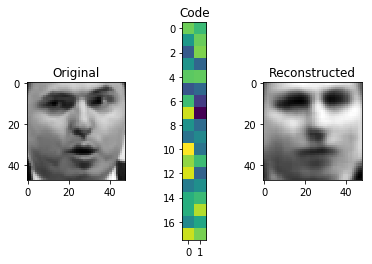

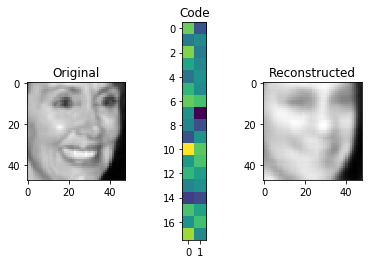

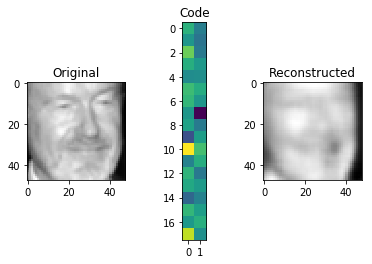

In [26]:
score = autoencoder.evaluate(X_test, X_test,verbose=0)
print("Final MSE:",score)

for i in range(3):
    img = X_test[i]
    visualize(img,encoder,decoder)

## 5. Denoising автоэнкодер 

Автоэнкодеры можно обучить убирать шум из данных: для этого надо на вход подавать зашумленные данные и на выходе сравнивать с данными без шума. Создадим модель, которая будет зашумлять входное изображение, а после пытаться избавить его от шума. 

In [27]:
# Добавляем на картинку немного шума 
def apply_gaussian_noise(X,sigma=0.01):
    return X + sigma*np.random.normal(loc=0.0, scale=1.0, size=X.shape) 

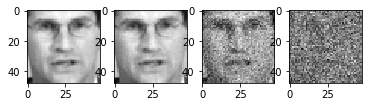

In [28]:
plt.subplot(1,4,1)
plt.imshow(X_train[0].reshape(48, 48), cmap = 'gray')
plt.subplot(1,4,2)
plt.imshow(apply_gaussian_noise(X_train[:1],sigma=0.01)[0].reshape(48, 48), cmap = 'gray')
plt.subplot(1,4,3)
plt.imshow(apply_gaussian_noise(X_train[:1],sigma=0.1)[0].reshape(48, 48), cmap = 'gray')
plt.subplot(1,4,4)
plt.imshow(apply_gaussian_noise(X_train[:1],sigma=0.5)[0].reshape(48, 48), cmap = 'gray');

In [29]:
# Зашумляем данные 
X_train_noisy = apply_gaussian_noise(X_train, sigma=0.1)
X_test_noisy = apply_gaussian_noise(X_test, sigma=0.1)

# Убираем все заскоки за отрезок [0;1]
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

Собираем сеточку из предыдущего пункта.

In [30]:
# размер горлышка имеет смысл взять побольше (почему?)
encoder_noisy, decoder_noisy = build_deep_autoencoder(input_shape, code_size=1024)

inp = L.Input(input_shape)
code = encoder_noisy(inp)
reconstruction = decoder_noisy(code)

autoencoder_noisy = Model(inp, reconstruction)
autoencoder_noisy.compile('adam', 'mse')

autoencoder_noisy.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 48, 48, 1)]       0         
_________________________________________________________________
sequential_6 (Sequential)    (None, 1024)              6818816   
_________________________________________________________________
sequential_7 (Sequential)    (None, 48, 48, 1)         6820096   
Total params: 13,638,912
Trainable params: 13,638,912
Non-trainable params: 0
_________________________________________________________________


In [31]:
hist_noise = autoencoder_noisy.fit(X_train_noisy, X_train,
                        epochs=10,
                        batch_size=256,
                        shuffle=True,
                        validation_data=(X_test_noisy, X_test))

Train on 11909 samples, validate on 1324 samples
Epoch 1/10
11909/11909 [==============================] - 8s 713us/sample - loss: 0.0476 - val_loss: 0.0199
Epoch 2/10
11909/11909 [==============================] - 8s 652us/sample - loss: 0.0173 - val_loss: 0.0149
Epoch 3/10
11909/11909 [==============================] - 8s 653us/sample - loss: 0.0138 - val_loss: 0.0130
Epoch 4/10
11909/11909 [==============================] - 8s 649us/sample - loss: 0.0119 - val_loss: 0.0116
Epoch 5/10
11909/11909 [==============================] - 8s 644us/sample - loss: 0.0108 - val_loss: 0.0104
Epoch 6/10
11909/11909 [==============================] - 8s 661us/sample - loss: 0.0100 - val_loss: 0.0099
Epoch 7/10
11909/11909 [==============================] - 8s 649us/sample - loss: 0.0095 - val_loss: 0.0092
Epoch 8/10
11909/11909 [==============================] - 8s 647us/sample - loss: 0.0088 - val_loss: 0.0090
Epoch 9/10
11909/11909 [==============================] - 8s 645us/sample - loss: 0.008

Final MSE: 0.008101468153151591


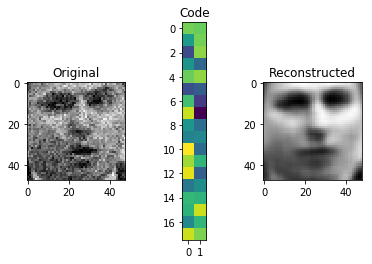

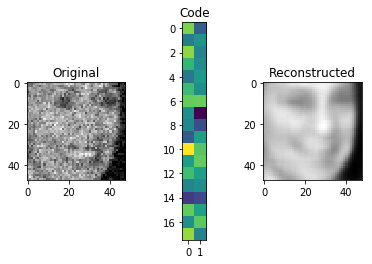

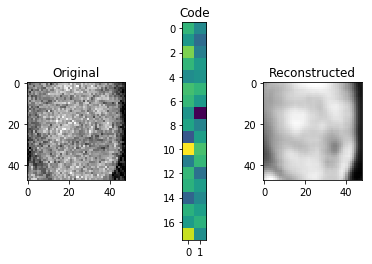

In [32]:
score = autoencoder_noisy.evaluate(X_test_noisy, X_test,verbose=0)
print("Final MSE:",score)

for i in range(3):
    img = X_test_noisy[i]
    visualize(img,encoder,decoder)

## 6.  Поиск похожих изображений 

С помощью найденного горлышка можно искать похожие друг на друга изображения. Чтобы ускорить процесс поиска, мы будем использовать похожий на метод ближайших соседей, но более быстрый алгоритм под названием [Locality Sensitive Hashing forest.](http://scikit-learn.org/0.16/modules/generated/sklearn.neighbors.LSHForest.html)

In [33]:
images = X_train
codes = encoder.predict(images)

# хорошая идея ставить по ходу архитекрутуры проверки на размерности :) 
assert len(codes) == len(images)

In [34]:
import sklearn
sklearn.__version__

'0.20.3'

In [35]:
from sklearn.neighbors import LSHForest
lshf = LSHForest(n_estimators=50).fit(codes)

/usr/local/lib/python3.7/site-packages/sklearn/neighbors/approximate.py:258: DeprecationWarning: LSHForest has poor performance and has been deprecated in 0.19. It will be removed in version 0.21.
  DeprecationWarning)


In [36]:
def get_similar(image, n_neighbors=5):
    
    code = encoder.predict(image[None])
    
    (distances,),(idx,) = lshf.kneighbors(code,n_neighbors=n_neighbors)
    
    return distances,images[idx]

In [37]:
def show_similar(image):
    
    distances,neighbors = get_similar(image,n_neighbors=11)
    
    plt.figure(figsize=[8,6])
    plt.subplot(3,4,1)
    plt.imshow(image.reshape(48,48), cmap = 'gray')
    plt.title("Original image")
    
    for i in range(11):
        plt.subplot(3,4,i+2)
        plt.imshow(neighbors[i].reshape(48,48), cmap = 'gray')
        plt.title("Dist=%.3f"%distances[i])
    plt.show()

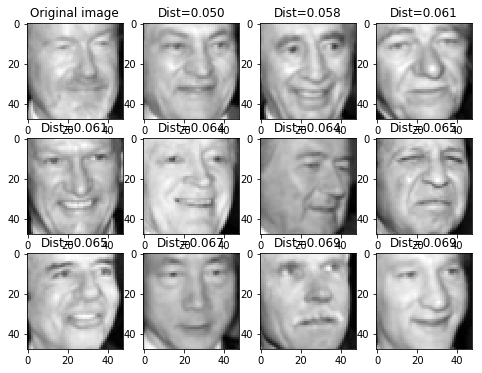

In [38]:
show_similar(X_test[2])

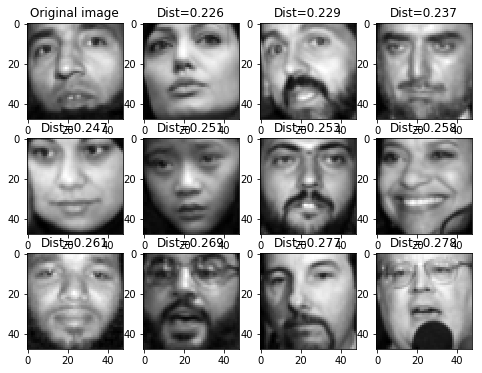

In [39]:
show_similar(X_test[500])

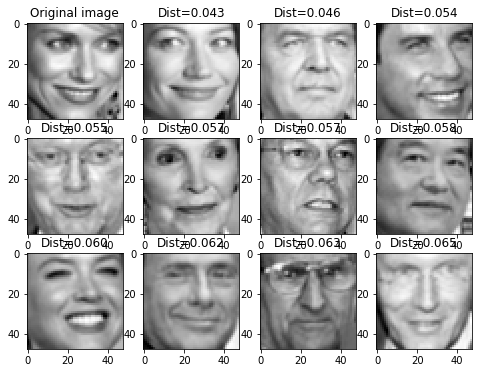

In [40]:
show_similar(X_test[66])

## 7.  Прогулка по пространству эмбедингов.

Можно брать два эмбединга, искать между ними линейную комбинацию и пытаться прогуляться от одного к другому :)

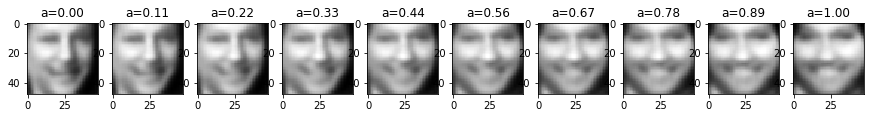

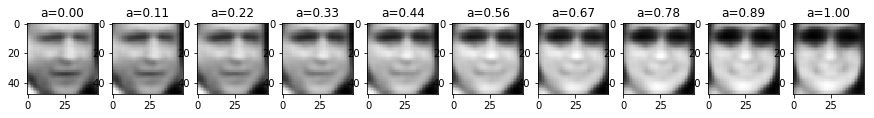

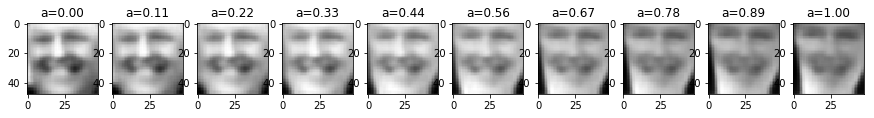

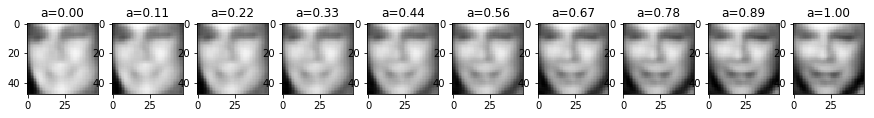

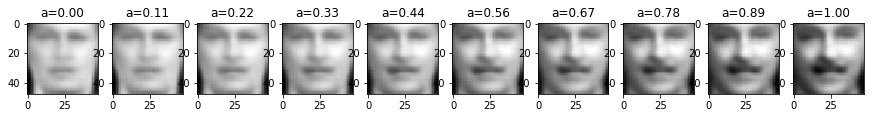

In [41]:
path_len = 10

for _ in range(5):
    image1,image2 = X_test[np.random.randint(0,len(X_test),size=2)]

    code1, code2 = encoder.predict(np.stack([image1, image2]))

    plt.figure(figsize=[15,6])
    for i,a in enumerate(np.linspace(0,1,num=path_len)):

        output_code = code1*(1-a) + code2*(a)
        output_image = decoder.predict(output_code[None])[0]

        plt.subplot(1, path_len, i+1)
        plt.imshow(output_image.reshape(48,48), cmap = 'gray')
        plt.title("a=%.2f"%a)        
    plt.show()